In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
heart_df = pd.read_csv("heart.csv")
heart_df.shape

(918, 12)

In [3]:
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
heart_df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [5]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
heart_df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<AxesSubplot:>

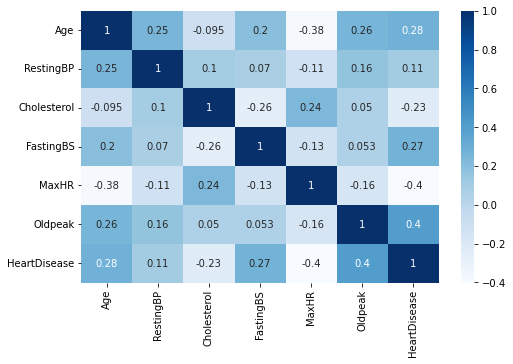

In [8]:
plt.figure(figsize= (8,5))
sns.heatmap(heart_df.corr(), annot=True, cmap='Blues')

<AxesSubplot:ylabel='ChestPainType'>

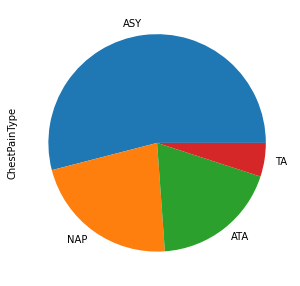

In [9]:
plt.figure(figsize= (10,5))
heart_df.ChestPainType.value_counts().plot(kind='pie')

<AxesSubplot:xlabel='Sex', ylabel='count'>

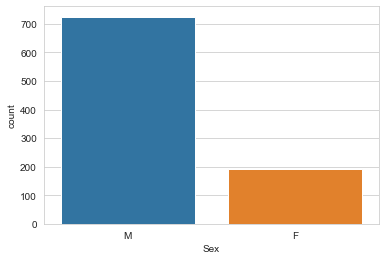

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Sex',data=heart_df)

<AxesSubplot:xlabel='Age', ylabel='Count'>

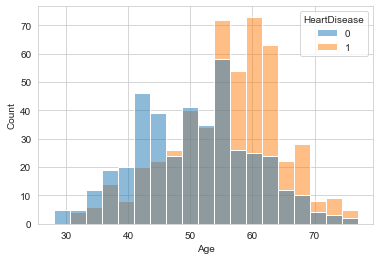

In [11]:
sns.set_style('whitegrid')
sns.histplot(x='Age',hue='HeartDisease', data=heart_df)

<AxesSubplot:xlabel='MaxHR', ylabel='Count'>

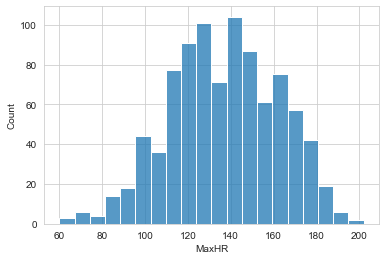

In [12]:
sns.set_style('whitegrid')
sns.histplot(x='MaxHR', data=heart_df)

<AxesSubplot:xlabel='ExerciseAngina', ylabel='Cholesterol'>

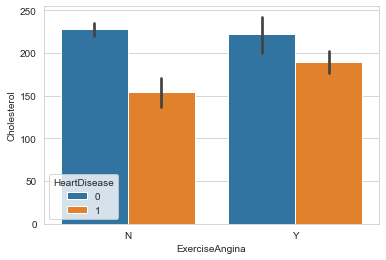

In [13]:
sns.barplot(x='ExerciseAngina',y='Cholesterol', hue='HeartDisease', data= heart_df)

<AxesSubplot:xlabel='Age'>

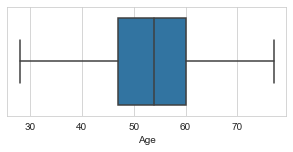

In [14]:
plt.figure(figsize= (5,2))
sns.boxplot(heart_df['Age'])

<AxesSubplot:xlabel='RestingBP'>

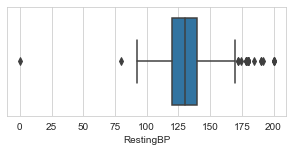

In [15]:
plt.figure(figsize= (5,2))
sns.boxplot(heart_df['RestingBP'])

In [16]:
Q1 = heart_df['RestingBP'].quantile(0.25)
Q3 = heart_df['RestingBP'].quantile(0.75)
IQR = Q3-Q1
print(Q1)
print(Q3)
print(IQR)

120.0
140.0
20.0


In [17]:
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

90.0 170.0


In [31]:
heart_df = heart_df[heart_df['RestingBP']< Upper_Whisker]

<AxesSubplot:xlabel='Cholesterol'>

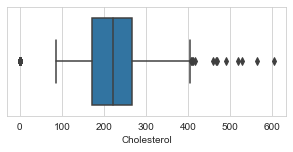

In [19]:
plt.figure(figsize= (5,2))
sns.boxplot(heart_df['Cholesterol'])

In [20]:
Q1 = heart_df['Cholesterol'].quantile(0.25)
Q3 = heart_df['Cholesterol'].quantile(0.75)
IQR = Q3-Q1
print(Q1)
print(Q3)
print(IQR)

172.25
265.75
93.5


In [21]:
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

32.0 406.0


In [22]:
heart_df = heart_df[heart_df['Cholesterol']< Upper_Whisker]

In [23]:
heart_df.shape

(866, 12)

In [24]:
#converting object type to numerical
variables=['Sex','ChestPainType', 'RestingECG','ExerciseAngina', 'ST_Slope']
encoded_data = pd.get_dummies(heart_df, prefix=variables, columns=variables)
encoded_data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [32]:
x=encoded_data.drop("HeartDisease",axis=1)
y=encoded_data["HeartDisease"]

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [35]:
x_train.shape,x_test.shape

((692, 20), (174, 20))

In [36]:
x_train.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
675,57,150,126,1,173,0.2,0,1,0,0,1,0,0,1,0,1,0,0,0,1
186,58,130,251,0,110,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
909,63,124,197,0,136,0.0,1,0,1,0,0,0,0,1,0,0,1,0,1,0
529,72,143,211,0,109,1.4,0,1,1,0,0,0,0,1,0,0,1,0,1,0
355,67,145,0,0,125,0.0,0,1,0,0,0,1,1,0,0,1,0,0,1,0


In [50]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=3)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=100)

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
dtc.fit(x_train,y_train)
pred1 = dtc.predict(x_train)
pred2 = dtc.predict(x_test)

In [53]:
accuracy_score(y_train,pred1)

0.8569364161849711

In [54]:
accuracy_score(y_test,pred2)

0.8390804597701149

[Text(279.0, 285.39000000000004, 'X[19] <= 0.5\nentropy = 0.989\nsamples = 692\nvalue = [304, 388]'),
 Text(139.5, 203.85000000000002, 'X[6] <= 0.5\nentropy = 0.64\nsamples = 394\nvalue = [64, 330]'),
 Text(69.75, 122.31, 'X[4] <= 140.5\nentropy = 0.51\nsamples = 335\nvalue = [38, 297]'),
 Text(34.875, 40.76999999999998, 'entropy = 0.304\nsamples = 240\nvalue = [13, 227]'),
 Text(104.625, 40.76999999999998, 'entropy = 0.831\nsamples = 95\nvalue = [25, 70]'),
 Text(209.25, 122.31, 'X[3] <= 0.5\nentropy = 0.99\nsamples = 59\nvalue = [26, 33]'),
 Text(174.375, 40.76999999999998, 'entropy = 1.0\nsamples = 51\nvalue = [26, 25]'),
 Text(244.125, 40.76999999999998, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(418.5, 203.85000000000002, 'X[8] <= 0.5\nentropy = 0.711\nsamples = 298\nvalue = [240, 58]'),
 Text(348.75, 122.31, 'X[0] <= 56.5\nentropy = 0.306\nsamples = 201\nvalue = [190, 11]'),
 Text(313.875, 40.76999999999998, 'entropy = 0.0\nsamples = 155\nvalue = [155, 0]'),
 Text(383.6

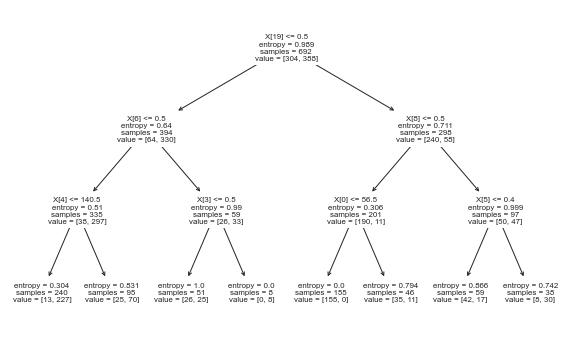

In [44]:
plt.figure(figsize = (10,6))
from sklearn import tree
tree.plot_tree(dtc.fit(x_train, y_train))